In [1]:
import requests
import json

In [2]:
ville = input("Quelle ville souhaitez-vous connaître la météo : ")

Quelle ville souhaitez-vous connaître la météo : paris


In [3]:
r = requests.get("http://api.openweathermap.org/data/2.5/weather?q={}&appid=3543ac0c00624ed3bb653359621e5344".format(ville))
data = r.json()
print(data)

{'coord': {'lon': 2.35, 'lat': 48.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 302.27, 'pressure': 1012, 'humidity': 33, 'temp_min': 301.15, 'temp_max': 303.15}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1530541800, 'sys': {'type': 1, 'id': 5610, 'message': 0.0033, 'country': 'FR', 'sunrise': 1530503527, 'sunset': 1530561425}, 'id': 2988507, 'name': 'Paris', 'cod': 200}


In [4]:
path_api = "http://api.openweathermap.org/data/2.5/forecast?q={}&appid=3543ac0c00624ed3bb653359621e5344"
prev = requests.get(path_api.format(ville))
data_prev = prev.json()
print(json.dumps(data_prev, sort_keys = True, indent = 4))


{
    "city": {
        "coord": {
            "lat": 48.8566,
            "lon": 2.3515
        },
        "country": "FR",
        "id": 2988507,
        "name": "Paris",
        "population": 2138551
    },
    "cnt": 40,
    "cod": "200",
    "list": [
        {
            "clouds": {
                "all": 64
            },
            "dt": 1530543600,
            "dt_txt": "2018-07-02 15:00:00",
            "main": {
                "grnd_level": 1013.47,
                "humidity": 58,
                "pressure": 1013.47,
                "sea_level": 1025.23,
                "temp": 302.04,
                "temp_kf": 0.79,
                "temp_max": 302.04,
                "temp_min": 301.255
            },
            "rain": {
                "3h": 0.5
            },
            "sys": {
                "pod": "d"
            },
            "weather": [
                {
                    "description": "light rain",
                    "icon": "10d",
                    

In [65]:
import datetime
ts = 1530565200
print(datetime.datetime.fromtimestamp(ts))

2018-07-02 23:00:00


In [8]:
def convert(kel):
    celsius = (kel- 273.15)
    return round(celsius, 2)
#convert(300)   

In [5]:
print("²²²² Bienvenue sur Weather Me ! B) ²²²²")
print("**** Le logiciel de prévision météo des 5 prochains jours. ****")

²²²² Bienvenue sur Weather Me ! B) ²²²²
**** Le logiciel de prévision météo des 5 prochains jours. ****


In [6]:
ville = input("Quelle ville souhaitez-vous connaître la météo : ")
r = requests.get("http://api.openweathermap.org/data/2.5/weather?q={}&appid=3543ac0c00624ed3bb653359621e5344".format(ville))
data = r.json()
prev = requests.get("http://api.openweathermap.org/data/2.5/forecast?q={}&appid=3543ac0c00624ed3bb653359621e5344".format(ville))
data_prev = prev.json()

date_jour = input("Entrée le numéro en deux chiffre (ex: 05, 15) de la journée don vous voulez connaitre les prévision météo: ")
date_mois = input("Cette fois entrée le mois: ")
date = "2018-"+date_mois+"-"+date_jour


Quelle ville souhaitez-vous connaître la météo : paris
Entrée le numéro en deux chiffre (ex: 05, 15) de la journée don vous voulez connaitre les prévision météo: 03
Cette fois entrée le mois: 07


In [9]:
list_date = []
list_celsius = []
print(date)
for i in range(len(data_prev["list"])):
    if date == data_prev["list"][i]["dt_txt"][0:10]:
        print(data_prev["list"][i]["dt_txt"][11:])
        print(str(convert(data_prev["list"][i]["main"]["temp"]))+"°C")
        list_date.append(data_prev["list"][i]["dt_txt"][11:16])
        list_celsius.append(convert(data_prev["list"][i]["main"]["temp"]))
        print("")
        

2018-07-03
00:00:00
20.11°C

03:00:00
17.64°C

06:00:00
20.87°C

09:00:00
25.78°C

12:00:00
29.12°C

15:00:00
30.42°C

18:00:00
29.31°C

21:00:00
23.56°C



In [12]:
np.mean(list_celsius)

24.60125

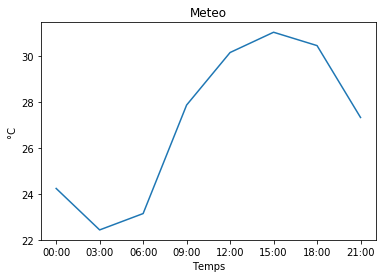

In [108]:
import matplotlib.pyplot as plt

plt.title("Meteo")
plt.plot(list_date, list_celsius)
plt.xlabel('Temps')
plt.ylabel('°C')
plt.show()

In [15]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [68]:
list_pays = []
ISO_alpha2 =[]
ISO_alpha3 = []
ISO_numérique = []
html = urlopen("http://www.atlas-monde.net/codes-iso/")
soup = BeautifulSoup(html, "html.parser")
desc_all = soup.find_all('td')
for i in range(4,len(desc_all),4):
    list_pays.append((desc_all[i]).get_text())
    ISO_alpha2.append((desc_all[i+1]).get_text())
    ISO_alpha3.append((desc_all[i+2]).get_text())
    ISO_numérique.append((desc_all[i+3]).get_text())
     
df = pd.DataFrame({"list_pays" : list_pays, "ISO_alpha2" : ISO_alpha2, "ISO_alpha3" : ISO_alpha3, "ISO_numérique" : ISO_numérique} , columns = ["list_pays", "ISO_alpha2", "ISO_alpha3", "ISO_numérique"] )
    
df


,list_pays,ISO_alpha2,ISO_alpha3,ISO_numérique
0,Afghanistan,AF,AFG,4
1,Îles Åland,AX,ALA,248
2,Albanie,AL,ALB,8
3,Algérie,DZ,DZA,12
4,Samoa américaines,AS,ASM,16
5,Andorre,AD,AND,20
6,Angola,AO,AGO,24
7,Anguilla,AI,AIA,660
8,Antarctique,AQ,ATA,10
9,Antigua-et-Barbuda,AG,ATG,28


# HOMMES

# T-SHIRT&DEBARDEUR


In [69]:
marque_htshirt = []
desc_htshirt = []
lien_htshirt = []
html = urlopen("https://www.galerieslafayette.com/c/homme-pret-a-porter-t-shirts+et+polos/f/t-shirts")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_htshirt.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_htshirt.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_htshirt.append((desc).get_text())

In [45]:
marque_hdeb = []
desc_hdeb = []
lien_hdeb = []
html = urlopen("https://www.galerieslafayette.com/c/homme-pret-a-porter-t-shirts+et+polos/f/debardeurs")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_hdeb.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_hdeb.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_hdeb.append((desc).get_text())

# PULL

In [54]:
marque_hpull = []
desc_hpull = []
lien_hpull = []
html = urlopen("https://www.galerieslafayette.com/c/homme-pret-a-porter-maille")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_hpull.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_hpull.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_hpull.append((desc).get_text())
print(marque_hpull)

['Polo Ralph Lauren', 'Polo Ralph Lauren', 'Polo Ralph Lauren', 'Polo Ralph Lauren', 'Polo Ralph Lauren']


# PANTALON ET SHORT

In [53]:
marque_hpant = []
desc_hpant = []
lien_hpant = []
html = urlopen("https://www.galerieslafayette.com/c/homme-pret-a-porter-pantalons+et+shorts")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_hpant.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_hpant.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_hpant.append((desc).get_text())

['Galeries Lafayette', 'Polo Ralph Lauren', 'Dockers', 'Tommy Hilfiger', 'Tommy Hilfiger']


In [52]:
marque_hshort = []
desc_hshort = []
lien_hshort = []
html = urlopen("https://www.galerieslafayette.com/c/homme-pret-a-porter-pantalons+et+shorts")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_hshort.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_hshort.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_hshort.append((desc).get_text())

# FEMMME

# TSHIRT & DEBARDEUR

In [70]:
marque_ftshirt = []
desc_ftshirt = []
lien_ftshirt = []
html = urlopen("https://www.galerieslafayette.com/c/femme-pret-a-porter-tops+et+t-shirts/f/t-shirts")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_ftshirt.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_ftshirt.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_ftshirt.append((desc).get_text())

In [ ]:
marque_fdeb =[]
desc_fdeb = []
lien_fdeb = []
html = urlopen("https://www.galerieslafayette.com/c/homme-pret-a-porter-t-shirts+et+polos/f/debardeurs")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_fdeb.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_fdeb.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_fdeb.append((desc).get_text())

# PULL

In [ ]:
marque_fpull = []
desc_fpull = []
lien_fpull = []
html = urlopen("https://www.galerieslafayette.com/c/homme-pret-a-porter-maille")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_fpull.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_fpull.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_fpull.append((desc).get_text())

# PANTALON & JUPE

In [71]:
marque_fpant = []
desc_fpant = []
lien_fpant = []
html = urlopen("https://www.galerieslafayette.com/c/femme-pret-a-porter-jeans")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_fpant.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_fpant.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_fpant.append((desc).get_text())

In [72]:
marque_fjupe = []
desc_fjupe = []
lien_fjupe = []
html = urlopen("https://www.galerieslafayette.com/c/femme-pret-a-porter-jupes")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_fjupe.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_fjupe.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_fjupe.append((desc).get_text())

# PARAPLUIE

In [ ]:
marque_para = []
desc_para = []
lien_para = []
html = urlopen("https://www.galerieslafayette.com/s/parapluies+automatiques/f/parapluies+automatiques")
soup = BeautifulSoup(html, "html.parser")
for marque in soup.find_all('strong',attrs={"class" :"pdt-brand bold-large-title-marque one"}):
    marque_para.append((marque).get_text())

for link in soup.find_all('a',class_="js-pdt-link js-recommendation-event"):
    lien_para.append("https://www.galerieslafayette.com" + link.get('href'))
for desc in soup.find_all('span',class_="pdt-name three"):
    desc_para.append((desc).get_text())
